# SeSiMe
### Sentence/Sequence Similarity Measure

### (1) BGC side
Import BGC data and create documents.

In [1]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
path_sesime = ROOT + "\\SeSiMe\\"

path_bgc_data = ROOT + "\\Data\\Crusemann_dataset\\bgc_crusemann\\"
path_results = ROOT + "\\Data\\"

import sys
sys.path.insert(0, path_sesime)

import BGC_functions


In [2]:
filename_include = "*.*"
filename_exclude = "_2."

BGCs, BGCs_dict, BGC_documents = BGC_functions.load_BGC_data(path_bgc_data, 
                                                              filename_include, 
                                                              filename_exclude, 
                                                              path_results, 
                                                              results_file = "BGC_collected_data_02.json", 
                                                              filefilter="*cluster001.gbk",
                                                              entry = "single")

BGC json file found and loaded.


In [3]:
# Have a look at how a document looks like:
print(BGC_documents[1])

['PF13847', 'PF00891', 'PF13489', 'PF01209', 'PF13659', 'PF12847', 'PF08241', 'PF02353', 'PF08242', 'PF06325', 'PF13649', 'PF08704', 'PF05175', 'PF01170', 'PF13679', 'PF00398', 'PF01596', 'PF01135', 'PF02390', 'PF07021', 'PF01728', 'PF12697', 'PF12695', 'PF00561', 'PF01408', 'PF02629', 'PF02615', 'PF01546', 'PF01261', 'PF01408', 'PF00155', 'PF01041', 'PF01212', 'PF01053', 'PF01041', 'PF01212', 'PF01053', 'PF00266', 'PF01135', 'PF08704', 'PF01269', 'PF01209', 'PF13489', 'PF13659', 'PF12847', 'PF13847', 'PF13649', 'PF08242', 'PF08241', 'PF01040', 'PF02737', 'PF03446', 'PF03721', 'PF00984', 'PF03720', 'PF03594', 'PF00860', 'PF13191', 'PF00004', 'PF12806', 'PF00196', 'PF13936', 'PF14493', 'PF12680', 'PF14534', 'PF04545', 'PF08281', 'PF04542', 'PF13193', 'PF00501', 'PF07366', 'PF12680', 'PF14534', 'PF13474', 'PF13577', 'PF08332', 'PF13347', 'PF00083', 'PF07690', 'PF12832', 'PF06609', 'PF00083', 'PF13454']


In [4]:
len(BGC_documents)  # number of BGCs = number of documents

5927

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [5]:
from Similarities import SimilarityMeasures

BGC_measure = SimilarityMeasures(BGC_documents)

Using TensorFlow backend.


In [6]:
BGC_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


### Word2Vec -based approach
Create Word2Vec based document centroid vectors

In [9]:
file_model_word2vec = path_sesime + 'models_trained\\model_word2vec_bgc_crusemann_window50_d100.model' 
BGC_measure.build_model_word2vec(file_model_word2vec, size=100, window=50, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [11]:
BGC_measure.get_vectors_centroid(extra_weights=None, tfidf_weighted=True)
BGC_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  5927  of  5927  documents.  of  5927  documents.  of  5927  documents.  of  5927  documents.Calculated distances between  5927  documents.


This has calculated (cosine) distances between all BGCs in an all-vs-all fashion.
The "num_hits" closest candidates for each BGC are listed in two matrices.

One stores the distances, the other the respective IDs.

In [12]:
BGC_measure.Cdistances_ctr[0,:]

array([0.        , 0.06975424, 0.06975424, 0.07196895, 0.10675113,
       0.12982297, 0.25665271, 0.26874224, 0.33626089, 0.33626089,
       0.33626089, 0.33626089, 0.33626089, 0.33626089, 0.33627199,
       0.33627199, 0.33627199, 0.33663493, 0.33699586, 0.33699586,
       0.33699586, 0.33699586, 0.33699586, 0.33699586, 0.33735287])

In [13]:
BGC_measure.Cdistances_ctr_idx[0,:]

array([   0, 4346, 4238, 1203,  326, 4503, 5565, 5392, 2473, 2281, 3679,
       2007,   92, 4737, 1314, 1091, 1732, 3776, 1260, 4889, 3091, 3127,
        528, 3420, 2672])

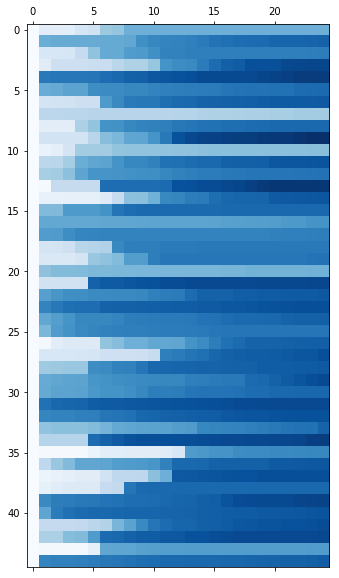

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(BGC_measure.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot genes to visually compare selected BGCs

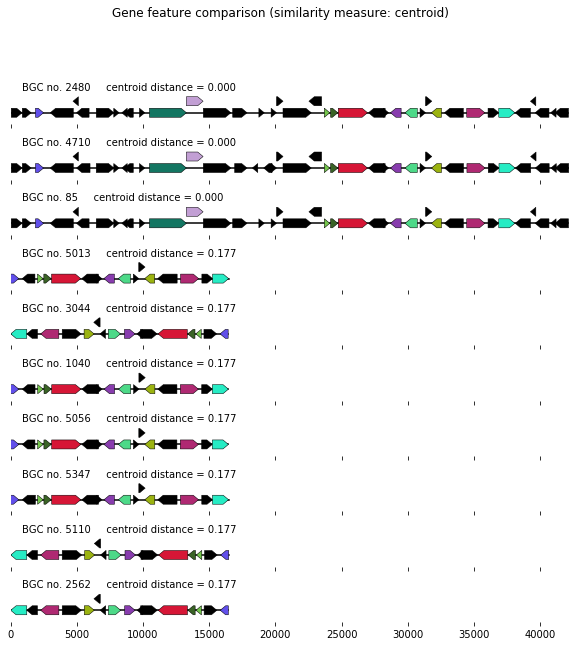

In [30]:
# Plot genes of closest candidates for query BGC id:
# intersting ones: 0, 7, 8, 9, 14, 43 (some very similar ones), 58
# interesting also 65, 76
# see 81 --> Short BGCs more quickly seem to be ranked as close!
BGC_functions.plot_bgc_genes(85, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [13]:
file_model_ae = path_sesime + 'models_trained\\model_autoencoder_bgc_crusemann.h5'
file_model_encoder = path_sesime + 'models_trained\\model_encoder_bgc_crusemann.h5'
BGC_measure.build_autoencoder(file_model_ae, file_model_encoder, epochs = 20, batch_size = 1024, encoding_dim = 100)

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               2177600   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_6 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_7 (Dense)    

In [14]:
BGC_measure.get_autoencoder_distances(num_hits=25, method='cosine')

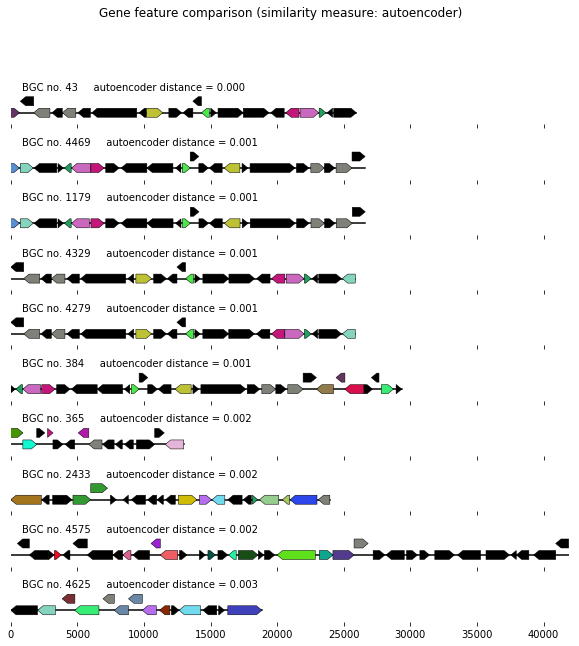

In [15]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 100 dimensional representations of each document using PCA.

In [16]:
BGC_measure.get_vectors_pca(100)

In [17]:
BGC_measure.get_pca_distances(num_hits=25, method='cosine')

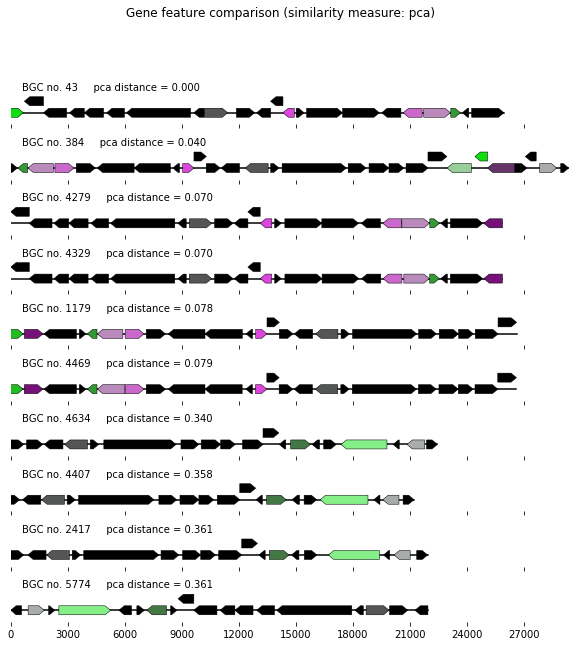

In [18]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")

#### C) Doc2Vec
Will calulate 100 dimensional representations of each document using Doc2Vec.

In [19]:
file_model_doc2vec = path_sesime + 'models_trained\\model_doc2vec_bgc_crusemann.model'
BGC_measure.build_model_doc2vec(file_model_doc2vec, vector_size=100, window=50, 
                             min_count=1, workers=4, epochs=250, 
                             use_stored_model=True)

Load stored doc2vec model ...


In [20]:
BGC_measure.get_doc2vec_distances(num_hits=25, method='cosine')

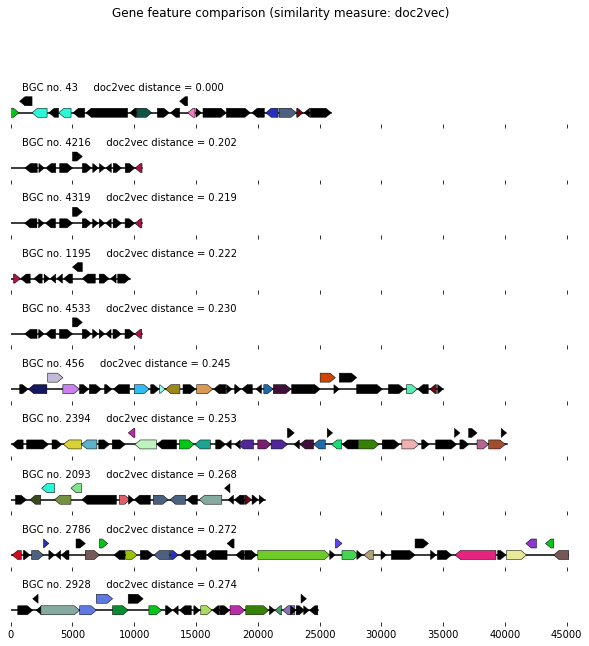

In [21]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "doc2vec")

#### D) LDA
Will calulate document distances using LDA.

In [22]:
file_model_lda = path_sesime + 'models_trained\\model_lda_bgc_crusemann.model'
BGC_measure.build_model_lda(file_model_lda, num_of_topics=100, num_pass=4, 
                        num_iter=100, use_stored_model=True)

Load stored LDA model ...


In [23]:
BGC_measure.get_lda_distances(num_hits=25)

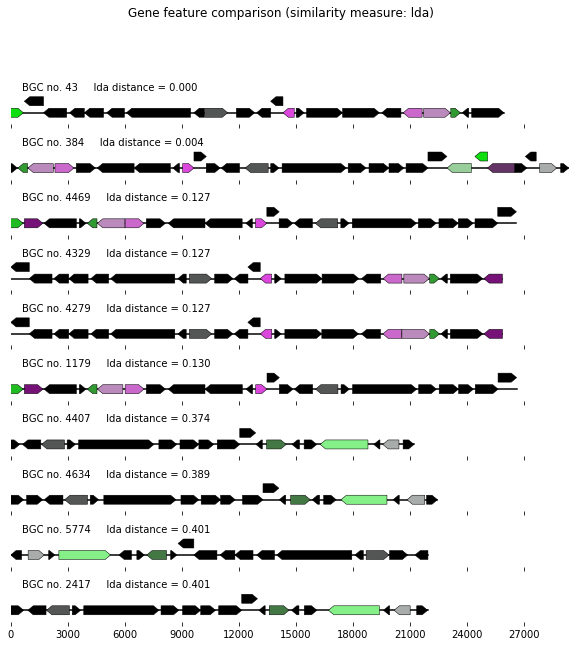

In [24]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lda")

#### E) LSI
Will calulate document distances using LSI.

In [25]:
file_model_lsi = path_sesime + 'models_trained\\model_lsi_bgc_crusemann.model'
BGC_measure.build_model_lsi(file_model_lsi, num_of_topics=100, 
                             use_stored_model=True)

Load stored LSI model ...


In [26]:
BGC_measure.get_lsi_distances(num_hits=25)

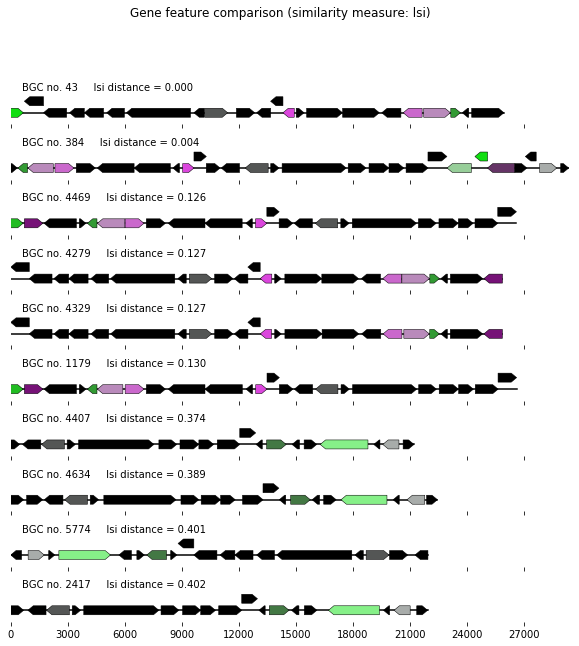

In [27]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lsi")

### (2) Mass spec side
Import MS data and create documents.

See other notebook: LINK